In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import pinv
from cmath import sqrt
from scipy.optimize import curve_fit

plt.rcParams.update({
    "text.usetex" : "True",
    "font.family": "Times"
})

# $m_{11}$

In [2]:
def m11(k):
    
    x = 1. + np.exp(1.j*k)
    x /= np.sqrt(4. + 2.*np.cos(k))
    
    return x

In [3]:
m11 = np.vectorize(m11)

In [4]:
t = np.linspace(-np.pi,np.pi,1000)

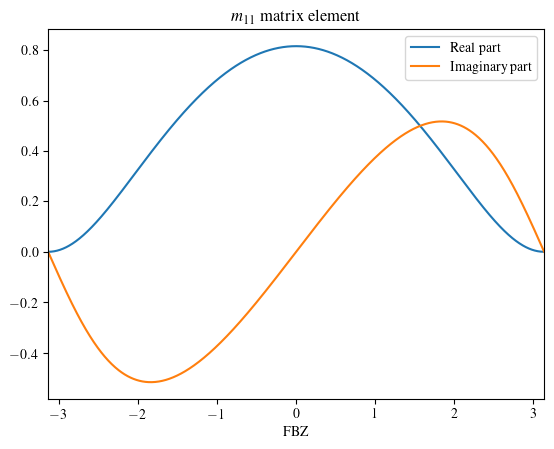

In [5]:
fig = plt.figure()

plt.plot(t,np.real(m11(t)), label="Real part")
plt.plot(t,np.imag(m11(t)), label="Imaginary part")

plt.title(r"$m_{11}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

#plt.savefig("m11.png")
plt.show()

# $m_{12}$

In [6]:
def m12(k):
    
    x = 1.
    x /= np.sqrt(2. + np.cos(k))
    
    return -x

In [7]:
m12 = np.vectorize(m12)

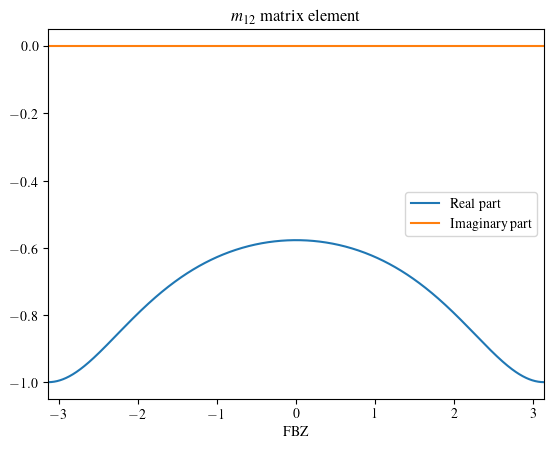

In [8]:
fig = plt.figure()

plt.plot(t,np.real(m12(t)), label="Real part")
plt.plot(t,np.imag(m12(t)), label="Imaginary part")

plt.title(r"$m_{12}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

#plt.savefig("m12.png")
plt.show()

# $m_{21}$

In [9]:
def m21(k):
    
    x = 1. + np.exp(1.j*k)
    x /= np.sqrt(1. + np.cos(k))
    x /= np.sqrt(2. + np.cos(k))
    
    return x

In [10]:
m21 = np.vectorize(m21)

C:\Users\enric\AppData\Local\Temp\ipykernel_6012\1511846962.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  x /= np.sqrt(1. + np.cos(k))
C:\Users\enric\AppData\Local\Temp\ipykernel_6012\1511846962.py:4: RuntimeWarning: invalid value encountered in scalar divide
  x /= np.sqrt(1. + np.cos(k))
C:\Users\enric\AppData\Local\Temp\ipykernel_6012\1511846962.py:5: RuntimeWarning: invalid value encountered in scalar divide
  x /= np.sqrt(2. + np.cos(k))


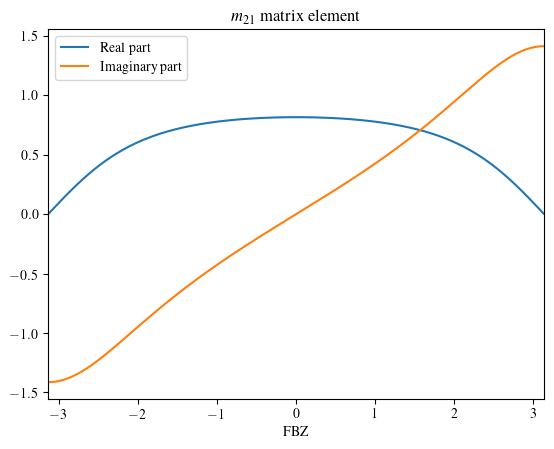

In [12]:
fig = plt.figure()

plt.plot(t,np.real(m21(t)), label="Real part")
plt.plot(t,np.imag(m21(t)), label="Imaginary part")

plt.title(r"$m_{21}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

#plt.savefig("m21.png")
plt.show()

# $m_{22}$

In [13]:
def m22(k):
    
    x = np.sqrt(1. + np.cos(k))
    x /= np.sqrt(2. + np.cos(k))
    
    return x

In [14]:
m22 = np.vectorize(m22)

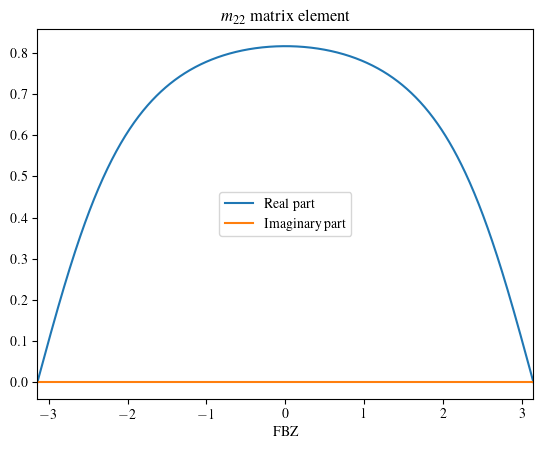

In [16]:
fig = plt.figure()

plt.plot(t,np.real(m22(t)), label="Real part")
plt.plot(t,np.imag(m22(t)), label="Imaginary part")

plt.title(r"$m_{22}$ matrix element")
plt.xlabel("FBZ")

plt.xlim(-np.pi,np.pi)
plt.legend()

#plt.savefig("m22.png")
plt.show()

# Self-energy

## Coupling to an A site

We calculate the self-energy when an atom is locally coupled to an A site and compare it to the analytical solution.

In [35]:
def slfen_a(z,N,g,eta=0.):
    
    k = np.linspace(-np.pi,np.pi,N,endpoint=True)
    om_a = 2.*np.ones(N)
    om_b = -2*(1+np.cos(k))
    z = z*np.ones(N)
    
    Sigma = np.sum( np.abs(m12(k))**2/(z-om_b+1.j*eta) )
    Sigma += np.sum( (np.abs(m11(k))**2)/(z-om_a+1.j*eta) )
    
    return Sigma*(g**2)/N

In [36]:
def an_slf_a(z,g,t,eta=0.):

    om_a = 2.
    Sigma = z/np.sqrt((z+2*t)**2 - 4 * t**2) + 0.j
    Sigma *= 1/(z-om_a+1.j*eta)
    Sigma *= g**2
    
    return Sigma

In [37]:
slfen_a = np.vectorize(slfen_a)

In [38]:
N = 400
g = 0.1
t = 1.
eta = -2*np.pi/N
E = np.linspace(1.,3.,1000)

In [39]:
res = slfen_a(E,N,g,eta)

In [40]:
res_an = an_slf_a(E,g,t,1.3*eta)

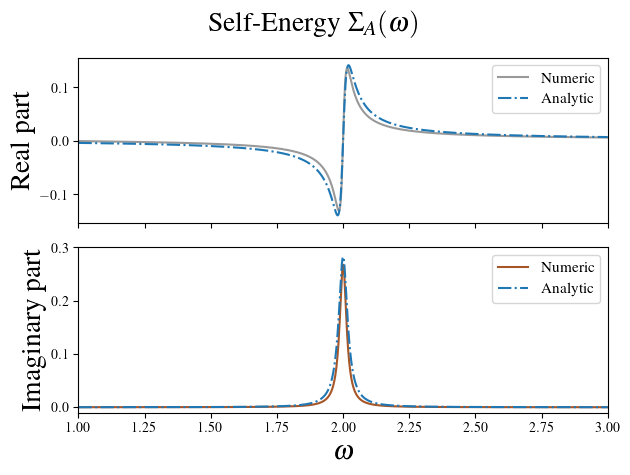

In [41]:
fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,tight_layout=True)

plt.suptitle(r"Self-Energy $\Sigma_A(\omega)$",fontsize=20)

ax[0].plot(E,np.real(res),c='#999999',label="Numeric")
ax[0].plot(E,np.real(res_an),label="Analytic",ls="-.")

ax[1].plot(E,np.imag(res),c='#a65628',label="Numeric")
ax[1].plot(E,np.imag(res_an),label="Analytic",ls="-.")

ax[1].set_ylim(-0.01,0.3)

ax[1].set_xlabel(r"$\omega$",fontsize=20)
ax[0].set_ylabel("Real part",fontsize=20)
ax[1].set_ylabel("Imaginary part",fontsize=20)

ax[1].set_xlim(E[0],E[-1])

ax[0].legend(fontsize=11)
ax[1].legend(fontsize=11)

#plt.savefig("SE_a.png")
plt.show()

## Coupling to a B site

In [42]:
def slfen_b(z,N,g,eta=0.):
    
    k = np.linspace(-np.pi+0.001,np.pi-0.001,N)
    om_a = 2.*np.ones(N)
    om_b = -2*(1+np.cos(k))
    z = z*np.ones(N)
    
    Sigma = np.sum( np.abs(m22(k))**2/(z-om_b+1.j*eta) )
    Sigma += np.sum( (np.abs(m21(k))**2)/(z-om_a+1.j*eta) )
    
    return Sigma*(g**2)/N

In [43]:
def an_slf_b(z,g,t,eta=0.):

    om_a = 2.
    Sigma = 1/np.sqrt(3) - 4*t/np.sqrt((z+2*t)**2 - 4 * t**2) + 0.j
    Sigma *= 1/(z-om_a+1.j*eta)
    Sigma *= -g**2
    
    return Sigma

In [44]:
slfen_b = np.vectorize(slfen_b)

In [45]:
N = 400
g = 0.1
t = 1
E = np.linspace(1,3,1000)

In [46]:
res = slfen_b(E,N,g,-2*np.pi/N)

In [57]:
res_an = an_slf_b(E,g,t,eta) 

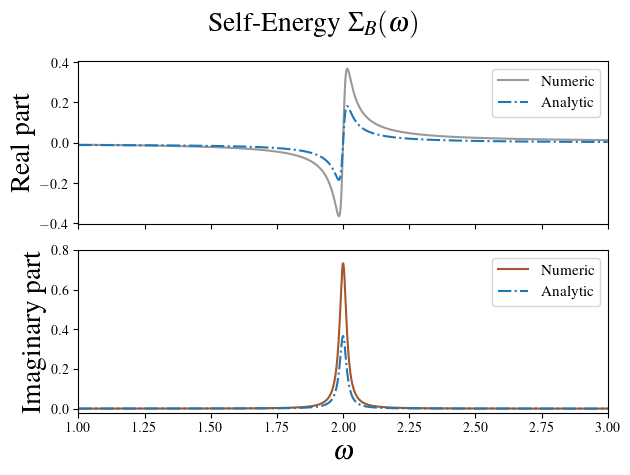

In [58]:
fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,tight_layout=True)

plt.suptitle(r"Self-Energy $\Sigma_B(\omega)$",fontsize=20)

ax[0].plot(E,np.real(res),c='#999999',label="Numeric")
ax[0].plot(E,np.real(res_an),label="Analytic",ls="-.")

ax[1].plot(E,np.imag(res),c='#a65628',label="Numeric")
ax[1].plot(E,np.imag(res_an),label="Analytic",ls="-.")

ax[1].set_ylim(-0.02,0.8)
ax[0].set_ylabel("Real part",fontsize=20)
ax[1].set_ylabel("Imaginary part",fontsize=20)


ax[1].set_xlabel(r"$\omega$",fontsize=20)

ax[1].set_xlim(E[0],E[-1])

ax[0].legend(fontsize=11)
ax[1].legend(fontsize=11)

#plt.savefig("SE_b.png")
plt.show()